# SYRIATEL CUSTOMER CHURN PREDICTION 

# BUSINESS UNDERSTANDING 

![Syrialtel Logo](Images/Syriatel.png)   

Since 2000, Syriatel has been the leading  Syrian mobile telecommunication company. The company believes in offering high quality products and services to it customers to meet the need of making life easier at a reasonable price. However, the company is facing a challenge of increased customer churn which has been observed for some period of time. The increased customer churn rates have negatively affected the company's revenue demanding a comprehesive understanding of the root causes. Hence for Syriatel to remain competitive within the Syrian telecommunication market, there is a need to identify the factors resulting in the increased customer churn rates and formulate proactive strategies to ensure they retain the active subscribers and attract new customers. 

This project provides a data-driven strategy to help the company address the customer churn challenge. The project aims at building classification models to predict the likelihood of a customer terminating business with the company. By implimenting this data-driven startegy, the company can easily anticipate the probably of customer stopping business with them and formulate strategies to increase the customer's satisfaction and end up retaining the customer earlier. This strategy can drive the company to a competitive edge within the market. The project  will help the company to proactively minimize the increased customer churn rates and provide better decision-making strategies. 

## Problem Statement

The Syrian mobile telecommunication market has become very competitive. As Syriatel navigates the competitive industry, it is facing a challenge of increased customer churn which has led to a decline in its sale revenue and brand loyalty. 

The goal of this project is to develop data-driven strategies to address the churn rate challenge. This project will develop classification models to forecast the chances of a customer leaving the comapny. The predictions made by the models will help the company adopt better strategies to help increase customer loyalty, satisfaction and to eventually increase customer retention rates. 

## Project Objectives 

1. Analyze Syriatel's churn  historical dataset
2. Identify customer churn patterns 
3. Develop two models to predict the probability of customer terminating the company's products and services. 
4. Provide data-driven recommendatioons and insights from the analysis and model prediction outcomes. 

## Conclusion 

By embracing this data- driven strategy, the created churn prediction models will be significant in minimizimg customer churn rates and increase consumer retention. By implimenting these machine learning technique and utilizing the given performance metrics, the company can proactively anticipate  customer churn risk and provide actionable insights. The strategies  boost the company towards sustainable growth, better market position with increased customer retention and satisfaction. 

# DATA UNDERSTANDING 

To uncover pattern's related to customer churn at Syriatel, will leverage a dataset available at Kaggle [Syriatel Dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) . 

The dataset contains customer data such as :
1. Demographic and account Info 
     * Account length: How long the customer has been with the company in (month )
     * State and Area Code: The Geographic details
2.  Service Features and plans
     * International plan: whether the customer has international calling plans 
    * Voicemail plan: whether the customer has voicemail subscriptions
    * Number Vmail Messages: Remaining voicemail messages. 
3. Call & Usage Data : Features realted to customer calling habits 
    * Total Day/Eve/Night/Intl Minutes
    * Total Day/Eve/Night/Intl Calls
    * Total Day/Eve/Night/Intl Charge
    * Customer Service Calls
4. Targer/ Predictor : Churn 

Whether a customer is likely to churn based on their demographic,account infor, services plan and call usage metrics. 


After loading the kaggle csv dataset to a Dataframe, it is clear that the dataset provides data on 3333 rows of customer and  21 columns of customer features. 
The dataset provides all the relevant features to model the customer churn prediction model covered later in this project . 

# DATA PREPARATION 

### IMPORT LIBARIES 

In [86]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


## Exploratory Data Analysis 

In [87]:
## View the data in a dataframe 
customer= pd.read_csv('Syriatel_dataset.csv')
customer.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data preparation
* Identify Missing values 
* Duplicated rows

In [88]:
## View of the Dataframe to identify Data Types and Missing Values 
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [89]:
## It is clear there are no misssing values in the dataset 
## Check for duplicates 
customer.duplicated().sum()
### There also no duplicates in the dataset. 

0

In [90]:
##Descriptive statistic summary for the numeric columns 
customer.describe()
## From the descriptive statistics there is no significant evidence of outliers. 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [91]:
### Consistent naming of columns 
column_names = customer.columns
new_column_names = []

for item in column_names:
    new_column_names.append(item.replace(' ', '_'))

customer.columns = new_column_names
customer.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploratory Data Analysis 

To better understand the data lets explore relationships between several variables in relation to customer churn 

Exploring the correlation between the different variables

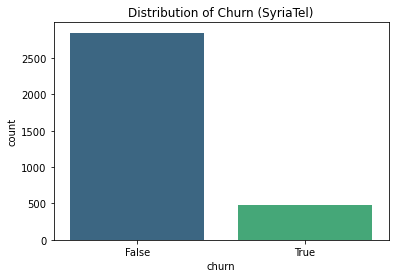

In [92]:
## Churn distribution across syriatel
churn_counts = customer['churn'].value_counts(normalize=True) * 100
sns.countplot(x='churn', data=customer, palette='viridis')
plt.title('Distribution of Churn (SyriaTel)')
plt.show()

Taking a look at the Distrinution of churn at syriatel, there is an evidence of a class imbalance between the two classes of churn and non-churn customers. This will need adjusting when modeling 

What is the relationship between customer service calls and customer churn 

No handles with labels found to put in legend.


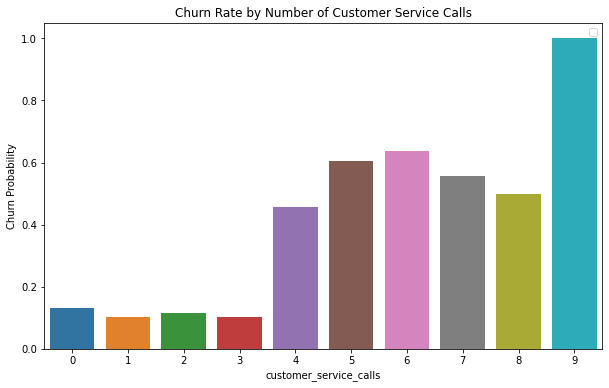

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(x='customer_service_calls', y='churn', data=customer, ci=None)
plt.title('Churn Rate by Number of Customer Service Calls')
plt.ylabel('Churn Probability')
plt.legend()
plt.show()

From the visualization above, its is evident that as the number of customer_service_calls increase, the chance of customer churn starts to increase. Therefore, once a customer makes more than 3 customer service calls, this should be a point of note for Syriatel 

### Customer service intensity 

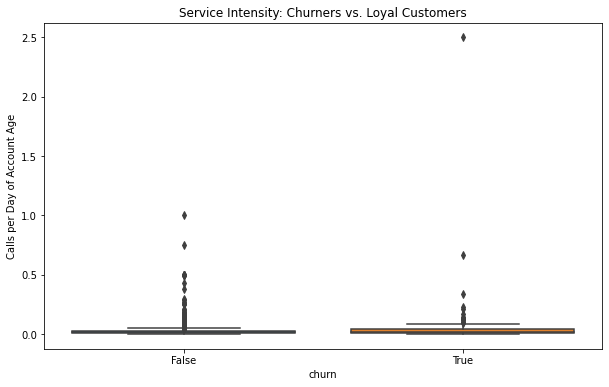

In [94]:
customer['service_intensity'] = customer['customer_service_calls'] / (customer['account_length'] + 1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='service_intensity', data=customer)
plt.title('Service Intensity: Churners vs. Loyal Customers')
plt.ylabel('Calls per Day of Account Age')
plt.show()

State customer churn rates 


No handles with labels found to put in legend.


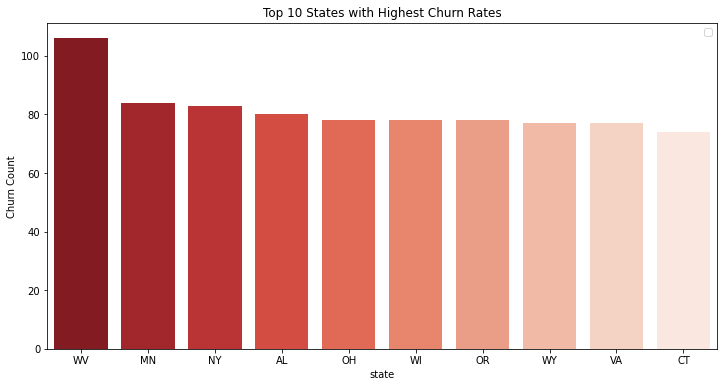

In [95]:
# Calculate Churn Rate per State
state_churn = customer.groupby('state')['churn'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='churn', data=state_churn.head(10), palette='Reds_r')
plt.title('Top 10 States with Highest Churn Rates')
plt.ylabel('Churn Count')
plt.legend()
plt.show()

Do international plans  have high churn rate ?


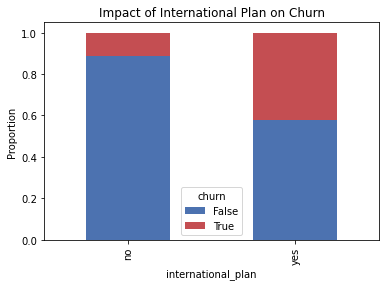

In [96]:
int_plan_churn = pd.crosstab(customer['international_plan'], customer['churn'], normalize='index')
int_plan_churn.plot(kind='bar', stacked=True, color=['#4C72B0', '#C44E52'])
plt.title('Impact of International Plan on Churn')
plt.ylabel('Proportion')
plt.show()

From the visualization, there is a problem in international plans regarding the increased churn rates since 60% of international customers have 40% churn rates

### Exploring the correlation between numerical features 

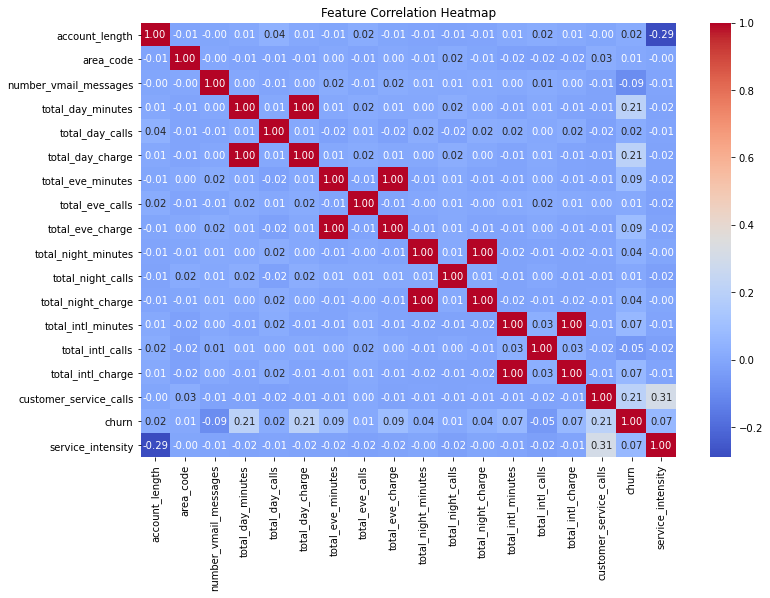

In [97]:
plt.figure(figsize=(12, 8))
numeric_df = customer.select_dtypes(include=['float64', 'int64', 'bool'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

## PRE-PROCESSING FOR MACHINE LEARNING 

In [98]:
# List of columns to remove based on the EDA findings
### Dropping columns with multilinearity 
cols_to_drop = [
    'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge',
    'phone_number', 'area_code',
    'total_day_calls', 'total_eve_calls', 'total_night_calls','account_length','state'
]
customer_cleaned = customer.drop(columns=cols_to_drop)
customer_cleaned

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,customer_service_calls,churn,service_intensity
0,no,yes,25,265.1,197.4,244.7,10.0,3,1,False,0.007752
1,no,yes,26,161.6,195.5,254.4,13.7,3,1,False,0.009259
2,no,no,0,243.4,121.2,162.6,12.2,5,0,False,0.000000
3,yes,no,0,299.4,61.9,196.9,6.6,7,2,False,0.023529
4,yes,no,0,166.7,148.3,186.9,10.1,3,3,False,0.039474
...,...,...,...,...,...,...,...,...,...,...,...
3328,no,yes,36,156.2,215.5,279.1,9.9,6,2,False,0.010363
3329,no,no,0,231.1,153.4,191.3,9.6,4,3,False,0.043478
3330,no,no,0,180.8,288.8,191.9,14.1,6,2,False,0.068966
3331,yes,no,0,213.8,159.6,139.2,5.0,10,2,False,0.010811


In [99]:
customer_cleaned.columns

Index(['international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
       'total_intl_minutes', 'total_intl_calls', 'customer_service_calls',
       'churn', 'service_intensity'],
      dtype='object')

In [100]:
## Defining feature groups 
num_features= ['number_vmail_messages',
        'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
       'total_intl_minutes', 'total_intl_calls', 'customer_service_calls',
        'service_intensity']
cat_features= ['international_plan','voice_mail_plan']

## Pre_processing 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ])
## Defining X and Y variable 
X= customer_cleaned[cat_features+num_features]
y=customer_cleaned['churn'].astype(int)

## Spliting Data First to prevent leakage 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)


# MODELING
## THE LOGISTIC REGRESSION MODEL 

### Building a pipeline to handle both scaling and modelling 

In [101]:
## Pipeline to scale and model
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=123, class_weight='balanced'))
])

## Fitting the train data model 
baseline_model.fit(X_train,y_train)


## Making predictions 

y_pred = baseline_model.predict(X_test)


### Evaluate the performance of the logistic model 

In [102]:
def model_eval (model,X_test,y_test):
    y_train_preds=model.predict(X_train)
    y_test_preds= model.predict(X_test)
    print('Recall_score: ')
    print('Train: ', recall_score(y_train, y_train_preds))
    print('Test: ', recall_score(y_test, y_test_preds))
    print('\nPrecision_score: ')
    print('Train: ', precision_score(y_train, y_train_preds))
    print('Test: ', precision_score(y_test, y_test_preds))
    print('\nAccuracy_score: ')
    print('Train: ', accuracy_score(y_train, y_train_preds))
    print('Test: ', accuracy_score(y_test, y_test_preds))
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot();

Recall_score: 
Train:  0.7616580310880829
Test:  0.7525773195876289

Precision_score: 
Train:  0.35766423357664234
Test:  0.3613861386138614

Accuracy_score: 
Train:  0.7674418604651163
Test:  0.7706146926536732


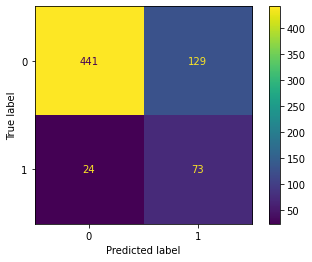

In [103]:
## Call the model evaluation function 
model_eval(baseline_model,X_test,y_test)

### Key_Takeaways 


The model has a consistency between the train and Test score   
Recall: 76% (Train ) and 75% (Test)   
Accuracy : 76%(Train) and 77%(Test)  
The model has prevented data leakage and overfitting.  
The model is generalizing well.   


The Baseline_Logistic Regression model has a Recall of 75% meaning that it effectively identify the majority of churn risk customers. A precision of 36% shows a high number of false positives(129) which is strategic for Syriatel.   
Syriatel can use the false positives to provide small discounts to loyal customers than totally loosing a  customers that were not identified(False Negatives)

## DECISION TREE MODEL 

In [104]:
### Define the decision Tree Model to a pipeline 
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Using the same preprocessor we built earlier
    ('classifier', DecisionTreeClassifier(max_depth=5, 
                                          class_weight='balanced', 
                                          random_state=42))
])
## Fit the Entire Pipeline to the Training Dataset
dt_pipeline.fit(X_train,y_train)

## Make predictions
y_pred_tree= dt_pipeline.predict(X_test)

### EVALUATE PERFORMANCE OF THE DECISION TREE 

Recall_score: 
Train:  0.8393782383419689
Test:  0.8144329896907216

Precision_score: 
Train:  0.7534883720930232
Test:  0.7383177570093458

Accuracy_score: 
Train:  0.9369842460615154
Test:  0.9310344827586207


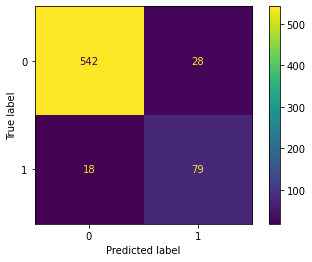

In [105]:
model_eval(dt_pipeline,X_test,y_test)

Key Takeaways

As compared to the logistic Regression model, The Recall has moved upto 81.4%    
Similary for the Precision which was 36% in Logistic Regression and now has doubled to 73.4%.  
With the high precision and Recall, the accuracy has increased to 93.1%   


### Hyperameter Tuning With GridSearchCV

In [106]:
## Defining parameters to test
parameter_grid= {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}
## Set up GridSearchCV using the pipeline 
dt_grid_search = GridSearchCV(
    estimator=dt_pipeline, 
    param_grid=parameter_grid, 
    cv=5, 
    scoring='recall', 
    verbose=1
)
## Run the GridSearch
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    4.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_eve_minutes',
                                                                          'total_night_minutes',
                                                                          'total_intl_minutes',
                                                                          'total_intl_calls',
                                                                          'customer_service_calls',
                                                                          'ser

In [107]:
# Evaluating the tuned model
# The  best estimator_
best_dt_model= dt_grid_search.best_estimator_

In [108]:
# Mean cross-validated score of the best_estimator
print(f'Validation recall: {dt_grid_search.best_score_}')

Validation recall: 0.798101898101898


### Evaluate performance of the Tuned Model 

Recall_score: 
Train:  0.8549222797927462
Test:  0.8865979381443299

Precision_score: 
Train:  0.43882978723404253
Test:  0.4725274725274725

Accuracy_score: 
Train:  0.8207051762940735
Test:  0.8395802098950524


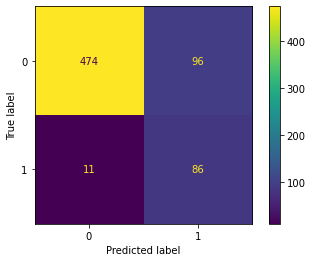

In [109]:
## Call the model_val function 
model_eval(dt_grid_search,X_test,y_test)

Key takeaways 
On tuning the model, the Recall has increased to 88.6% meaning that the model captures 89% of the churners.  
However, there is a significant drop in Precision to 47%


## Random Forest Model

In the Hyperameter tuned decision tree, we sacrificed to much precision for recall and will try avoid that in Random Forest by using F1 as the scoring metric rather than recall . 
Will use the Pre-processor, and pipeline (to avoid overfitting)

In [110]:
## Create a Random Forest Pipeline 
forest_pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor), # Your established scaling/encoding
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
## Parameter Grid 
forest_param_grid={
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__max_features': ['sqrt', 'log2']
}
## Initialize the GridSearchCV with F1 score
forest_grid_search=GridSearchCV(
    estimator=forest_pipeline, 
    param_grid=forest_param_grid, 
    cv=5, 
    scoring='f1', 
    verbose=1,
    n_jobs=-1
)

## Fiting the Random Forest model
forest_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_eve_minutes',
                                                                          'total_night_minutes',
                                                                          'total_intl_minutes',
                                                                          'total_intl_calls',
                                                                          'customer_service_calls',
                                                                          'ser

### Evaluating the performance of the Random Forest model

In [111]:
## Evaluate the best version 
best_random_forest= forest_grid_search.best_estimator_

Recall_score: 
Train:  0.883419689119171
Test:  0.7731958762886598

Precision_score: 
Train:  0.9855491329479769
Test:  0.9375

Accuracy_score: 
Train:  0.981245311327832
Test:  0.95952023988006


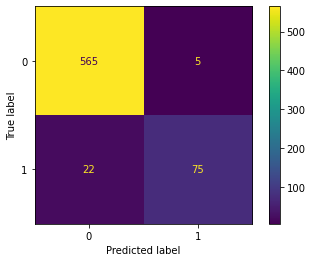

In [112]:
# Execute the Model evaluation function
model_eval(best_random_forest,X_test,y_test)

### Key Take Away

This RandomForest seems the outstanding model.  
The model has a 93.8% Precision  and a Recall of 77.3%. 
The model does not overfit  Witha training accuracy of 98.1% (Train) and 95.9% (Test). indicates that the model has gneralized the patterns perfectly

### FEATURE IMPORTANCE 

In [113]:

def plot_feature_importances(pipe, num_features, cat_features, figsize=(10, 8)):
  
    model = pipe.named_steps['classifier']
    preprocessor = pipe.named_steps['preprocessor']
    
    ohe_names = list(preprocessor.named_transformers_['cat'].get_feature_names(cat_features))
    
    full_feature_names = num_features + ohe_names
    
    importance_df = pd.DataFrame({
        'Feature': full_feature_names,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=True).tail(15) 
    
    plt.figure(figsize=figsize)
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature Name')
    plt.title('SyriaTel Churn: Top 15 Predictors (Random Forest)')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


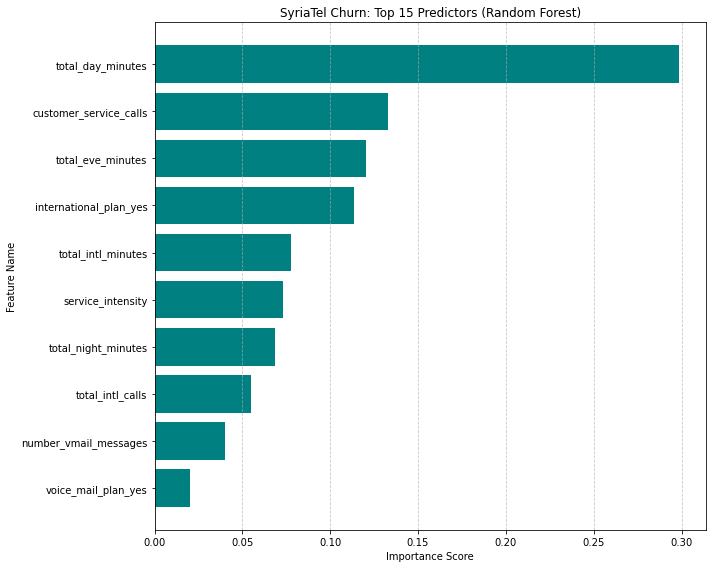

In [114]:
plot_feature_importances(best_random_forest, num_features, cat_features)

# CONCLUSION AND RECOMMENDATION 

## PROJECT CONCLUSION 

This project has progressed from a simple logistic regression model to a decision tree, A tuned decision Tree and finally to a Random Forest tuned for F1 score.
The Random Forest was a great choice due to its best performance compared to the other models. The model has an accuracy score of 96% and a Precision of 93.8%.  
The model has a Recall of (77.3%) which ensures that Syriatel customer retention efforts are focused on customers who are likely to churn rather than wasting too much resources on the loyal customers.  
The model shows some stability as there is no evidence of overfitting as the accuracy scores are 98%  on the training and 96% on the test. Meaning that the model generalized the underlying patterns on customer churn data.

## BUSINESS RECOMMENDATIONS

The visualization above is a clear illustration of the 10 drivers of customer churn in Syriatel.   
The Feature importance identified should be a guideline to formulate strategies that minimize customer churn 

1. Total_Day_Minutes customers are at the top of churners.
There is a likelihood that daytime users are price sensitive hence providing offers and promotions and discounts with high usage with lower per-minute rate could minimize churn rates as it prevents them from seeking alternative mobile telecommunication companies. 
2. Customer Service: There is an indicator that customers who make the 3rd and 4th customer service call have a high churn risk.   
Syriatel should impliment priority customer service alter. The alert should be available to the senior customer service agents once a customer hits the 3rd and 4th threshold to proactively address their issues before switching to a competitor. 
3. Customers with International plans often show higher churn rates. Review the international pricing to get insights on why most international plan customers are terminating business with the company. Probably more survey to gain more insights . But better charges on international plans could resolve the increased churn rates on international plan customers. 



### Next Steps

1. Real_time deployment   
Syriatel should move from the Random Forest model  into a production where it can take real_time customer score and provide all churn rik associated customers to the marketing and development teams for proactive measures. 
2. The marketing team should embrace customer segmentation strategies such as clustering to group and classify customers and group them dependant on common features.